# Tasks

Write a complete Jupyter notebook containing the code required to generate a resonance plot like the one shown in
https://en.wikipedia.org/wiki/Harmonic_oscillator  
Include all relevant equations, explain each step, document all code.  

I would like you to integrate the ODE for a range of driving frequencies and damping rates, and use those results to generate a plot that shows the dependence on different parameters.  

Optional: It would be great if you could also compare the numerical results to theoretical predictions.  
You may take any material from my notes. If you use anything else (including wikipedia) then make sure that you include a reference or link.

# Summary of Harmonic Oscillator

Gisu Ham 10134838  
Justin Park 10115894

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import scipy.integrate as integrate

A simple harmonic oscillator describes the mechanics of a harmonic motion. A harmonic
motion is portrayed either by a swinging pendulum, a linear spring with a weight attached to it or
a vibrating string, all of them have a common property which is having a tendency to return to
it’s equilibrium position while constantly experiencing a restoring force. The oscillations
happen periodically, therefore the frequencies and amplitudes play a significant role in
characterizing the harmonic motion.
The general equation for a simple harmonic oscillator follows Newton’s 2 nd Law and is given by:

$$m\ddot{x} = -kx$$

Which has solutions of :

$$x(t) = Acos(\omega t +\phi)$$

With: $$\omega = \sqrt{\frac{k}{m}}$$

Where $k$ is the spring constant and $m$ is mass and $\phi$ describes the phase shift.  

In an isolated system with no external forces, a simple harmonic oscillator do not
lose any mechanical energy and oscillates efficiently but with real life cases where external forces are
present, the oscillator is said to experience damping. Damping occurs with the presence of an
external force of friction which evidently will slow down the motion of the oscillator. In
damping sequences, the force of damping is directly proportional to the the velocity of the system at a given time,
along with $c$ the viscous damping coefficient.
With the relations:

$$\omega_o = \frac{c}{2m}$$ 

$$\zeta = \frac{c}{2\sqrt{mk}}$$

$\omega_o$ is the natural frequency, or in this case an undamped angular frequency. 

The properties of damping can be described according to the given value of damp ratio zeta,
with three cases:

Critical ($\zeta$ = 1) The system returns to equilibrium in the least time as possible. This decreases
any case of overshooting, and does not oscillate.

Underdamped ($\zeta$ < 1) The system tends to oscillate and gradually approach zero.

Overdamped ($\zeta$ > 1) Exponentially decays to steady state. The as the magnitude of zeta increases, the oscillator tends to return to equilibrium point slower.

Because of these cases, the zeta value of any simple harmonic oscillator system essentially
defines the nature of the system. The frequency $\omega$ and $\omega_o$ ratio expresses the
level of damping in a system with respect to the critical damping of the system.

In a driven case, a damped oscillator is said to be driven by an external force with the equation is given by: 

$$\frac{d^2x}{dt^2} + 2\zeta\omega_o\frac{dx}{dt}+\omega_o^2x = \frac{F(t)}{m}$$

A case where the sinusodial drivinng force with driven amplitude $F_o$ and independent of initial conditions,

$$\frac{d^2x}{dt^2} + 2\zeta\omega_o\frac{dx}{dt}+\omega_o^2x = \frac{F_o(t)}{m}sin(\omega t)$$

Then the transient solution is given by:

$$x(t) = Ae^{-\zeta\omega_ot}sin(\sqrt{1-\zeta^2}\omega_ot + \phi)$$

And the steady-state solution is given by:

$$x(t) = \frac{F_o}{m\omega Z_m}sin(\omega t + \phi)  $$

Where: 

$$ Z_m = \sqrt{(2\omega_o\zeta)^2 + \frac{(\omega_o^2 - \omega^2)^2}{\omega^2}} $$

Because the amplitude dies down eventually with respect to time, the summation of the transient solution and steady-state solution shows the expected amplitude chart and the differences of damping ratios. Because the damped oscillator "dies off" the solution with respect to transient approaches zero but the steady-state solution evenutally remains constant. The resonance plot required for this assignment will follow the steady state relationship between amplitude and frequency and is given by the equation: 

$$A(\zeta,\omega)= (\frac{1}{\sqrt{(1-\omega^2)^2 + (2\zeta\omega)^2}})$$


This amplitude function can be derived from the solutions as shown in the wikipedia reference and it will portray the affect of different damping ratios on the oscillation amplitude. Integrating in a range of driving frequencies will obatin the resonance plot. 


Reference used: Wikipedia article "Harmonic Oscillator"
https://en.wikipedia.org/wiki/Harmonic_oscillator

# Theoretical predictions

First, we use the Amplitude function $A(\zeta,\omega)$ given above to plot the Amplitude A vs $w/w_o$ where $w$ is the driving frequency and $w_o$ is the natural frequency. We will call this the theoretical plot.

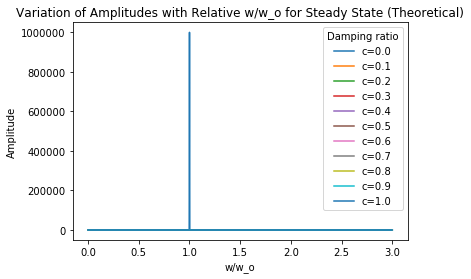

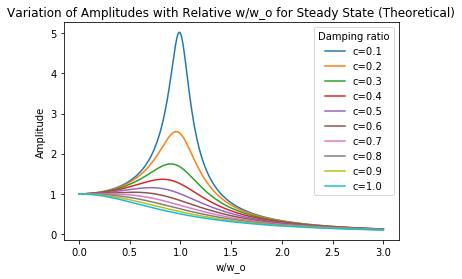

In [2]:
def Amplitude_function(w,c):   #w=driving frequency, c= damping ratio
    return 1/(math.sqrt((1-w**2)**2+(2*c*w)**2))


def theoretical_plot(b):      #set b==1 if want to include very small damping ratio. b== else if not
    X=np.linspace(0,3,num=1000)
    Y=[]
    y=[]

#every if statements only run when b==1

    
    
    if b==1:   # append set of amplitudes of damping ratio 0.0000005
        for w in range(0,1000,1):
            y.append(Amplitude_function(X[w],0.0000005))
        Y.append(y)
        
    for c in range(1,11,1): # append set of amplitudes of damping ratios from 0.1 to 1.0
        y=[]
        for w in range(0,1000,1):
            y.append(Amplitude_function(X[w],c/10))
        Y.append(y)
    
    
    if b==1:   #plot and label 'including' damping ratio 0.0000005
        for i in range(0,len(Y)):
            plt.plot(X,Y[i],label="c="+str((i)/10))
    else:      #plot and label 'excluding' damping ratio 0.000005
        for i in range(0,len(Y)):
            plt.plot(X,Y[i],label="c="+str((i+1)/10))
        

    if b==1:   # show plot of all the damping ratio including 0.0000005
        plt.title("Variation of Amplitudes with Relative w/w_o for Steady State (Theoretical)")
        plt.ylabel("Amplitude")
        plt.xlabel("w/w_o")
        plt.legend(loc=0, title='Damping ratio')
        plt.show()
        Y.pop(0)
        for i in range(0,len(Y)):
            plt.plot(X,Y[i],label="c="+str((i+1)/10))


    # show plot of all the damping ratio excluding 0.0000005
    plt.title("Variation of Amplitudes with Relative w/w_o for Steady State (Theoretical)")
    plt.xlabel("w/w_o")
    plt.ylabel("Amplitude")
    plt.legend(loc=0, title='Damping ratio')
    plt.show()
    
    
    
theoretical_plot(1)

note that in the first plot, the damping ratio corresponding to $c=0.0$ is not exactly zero, but rather a very small value was used ($5*10^{-7}$). If it was exactly zero, the maximum amplitude would approach infinity as well as giving zero-division error when $w=1$. The height for $c=0.0$ consumes the entire plot generated, thus we exclude such case and begin with $c=0.1$ as shown in the second plot.

# Numerical approach

Now we attempt to mimic the theoretical plot above with numerical methods. We expand on the lines of codes created by Dr.Jackel. In his code, ODE integration funtion (odeint) calls the function called func_harmonic_damped_driven that returns the derivatives of position x and velocity v of the harmonic oscillator under the effect of damping and driving system. Then the final result is a set of x,v values (state_vector_sequence) of damped driven oscillator that can be plotted and analyzed.
  
His code and its results are shown below as a reference. Note that in the plot below, approximately after 40 seconds, the amplitudes both lines approach a constant value respectively. When this occurs, the system is said to be in steady state. We address the lack of y-label and legends shortly.

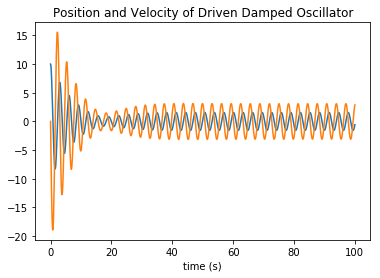

In [3]:
def func_harmonic_damped_driven( state_vector, time, omega=2.1, gamma=0.25, omega_0=2.0):
    """
    This python function returns the time derivative of the state vector 
    for a damped+driven linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega*omega*x - gamma*v + 1.0 * np.cos(omega_0*time)]
    return deriv

timesteps = np.linspace(0.0, 100.0, 999)
state_vector_initial = [10.0, 0.0]
state_vector_sequence = integrate.odeint( func_harmonic_damped_driven, state_vector_initial, timesteps )

plt.plot( timesteps, state_vector_sequence)
plt.title("Position and Velocity of Driven Damped Oscillator")
plt.xlabel("time (s)")
plt.show()

Since we are going to plot steady state amplitudes, we need to identify the time it takes for the dampped driven harmonic oscillator to reach steady states for difference driving frequencies and damping coefficients. Without a doubt, there exists mathematical solutions, however, we attempt to plot 'few' graphs for a range of driving frequencies and damping coefficients to approximate the time required to reach steady state. The range that we are going to use to test are also the ranges we will use when generating the numerical Amplitude vs $w/w_o$ plot.

Note that we will not label which line is position and which line is the velocity. Labeling them adds little insights when identifying steady state because position cannot be in the steady state without the velocity also being in the steady state and vice versa (velocity is the first derivative of position w.r.t time). If one wishes to identify them, a line that corresponds to the initial height of 10 when time is zero is the position because that is our initial condition. We have also left our y-axis blank since we have both position and velocity on the same plot.

Below are the 100 plots of position and velocity each at uniquely different driving frequency $w$ and damping coefficient $d$.

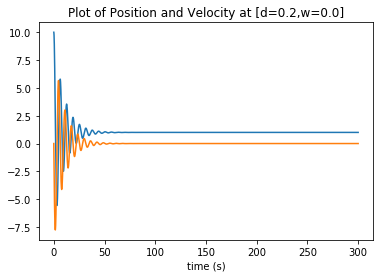

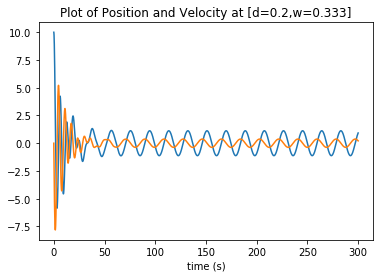

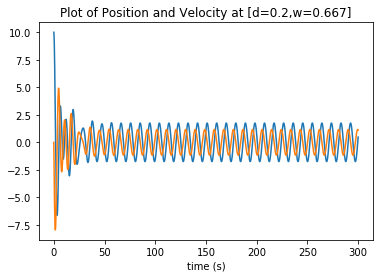

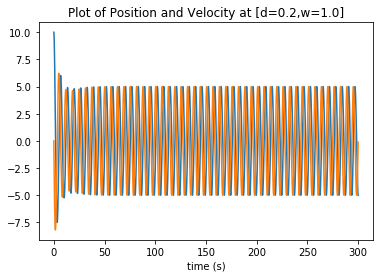

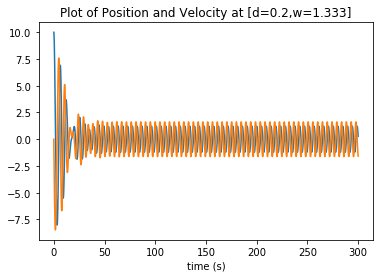

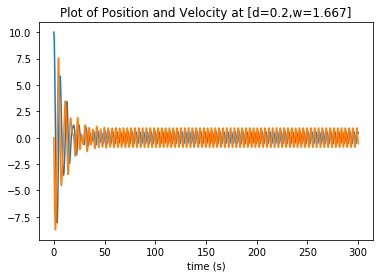

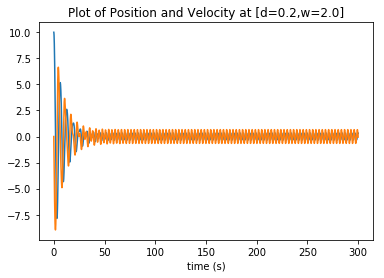

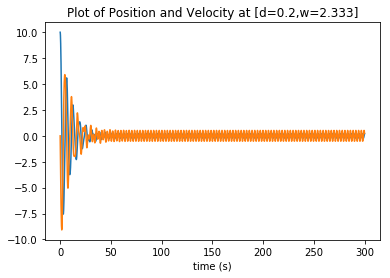

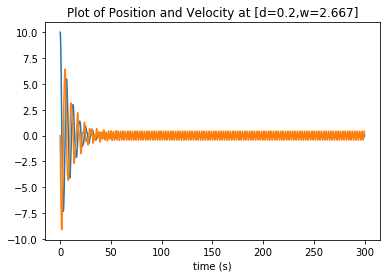

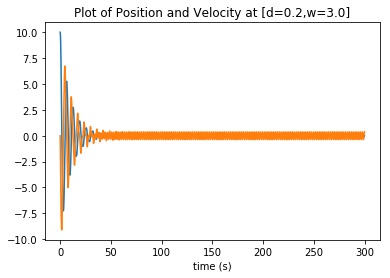

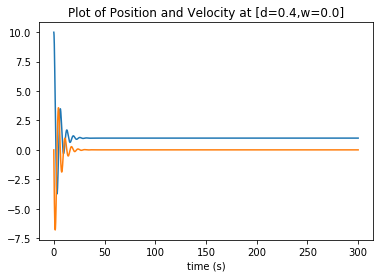

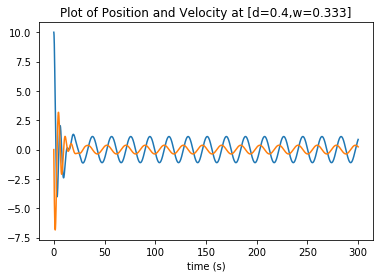

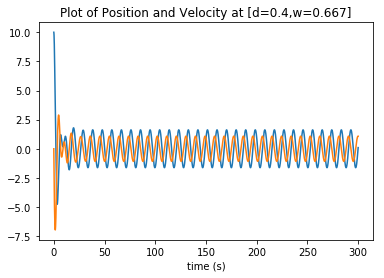

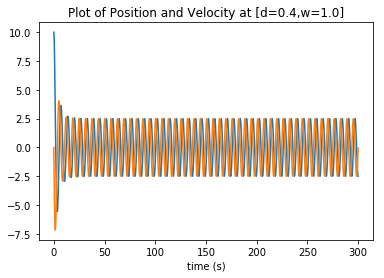

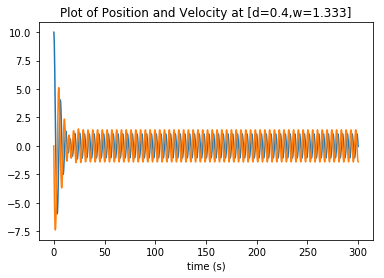

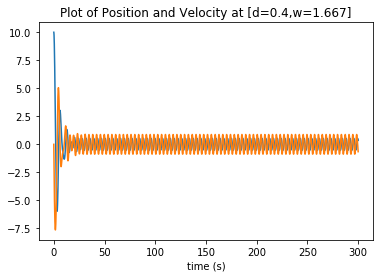

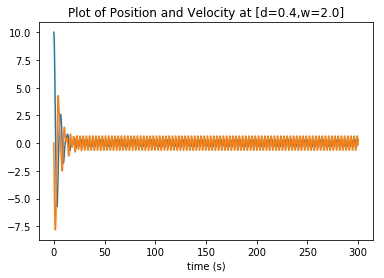

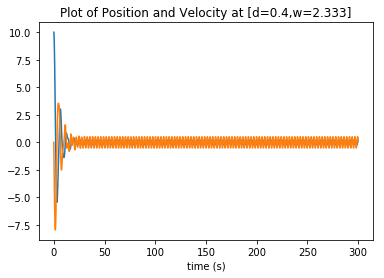

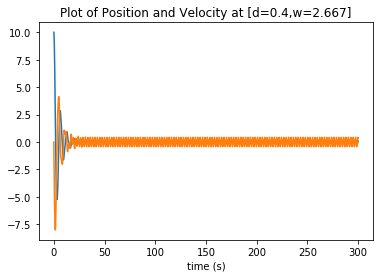

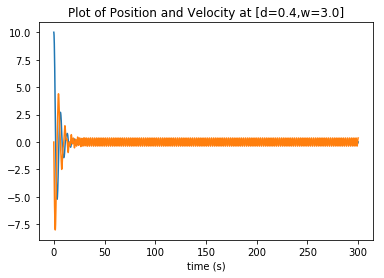

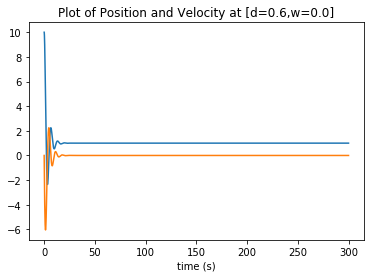

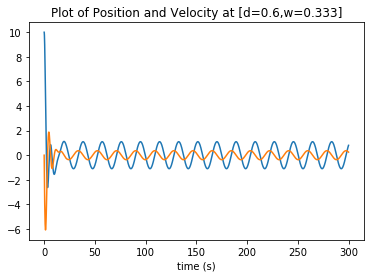

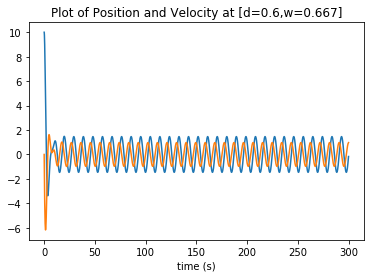

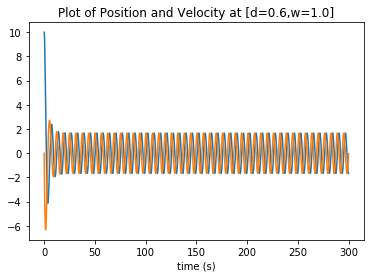

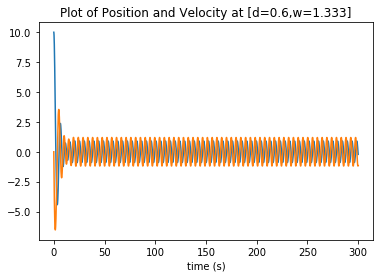

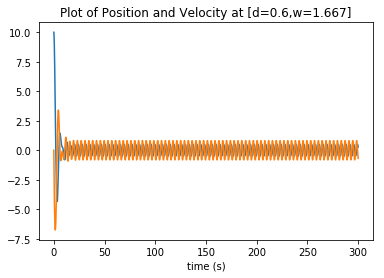

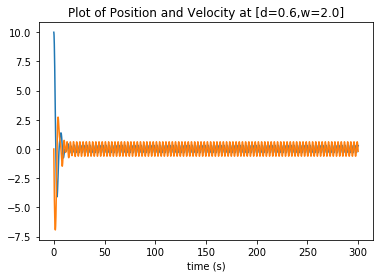

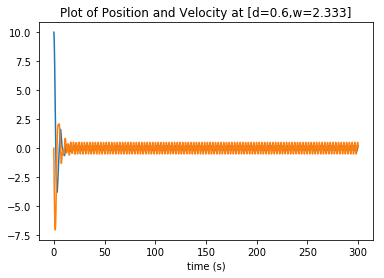

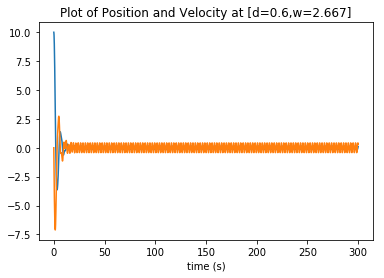

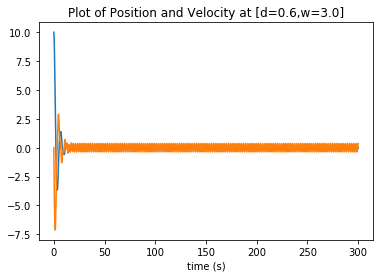

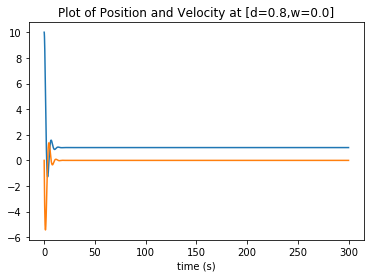

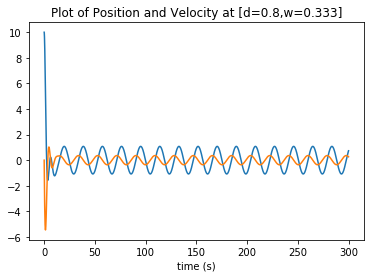

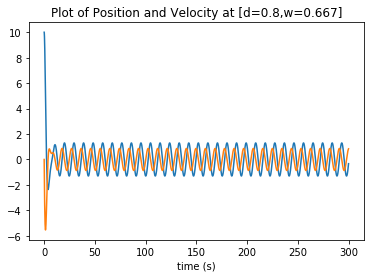

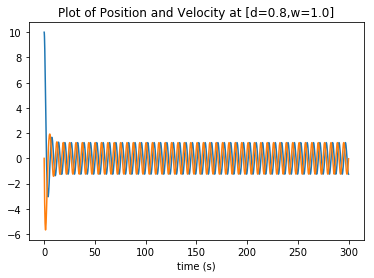

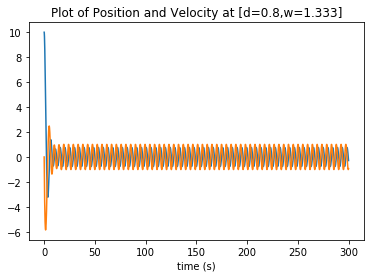

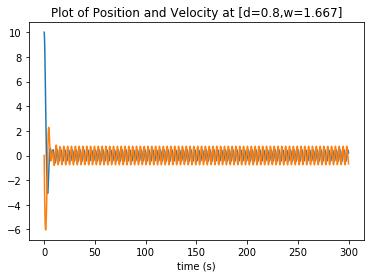

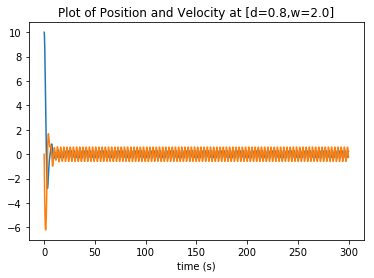

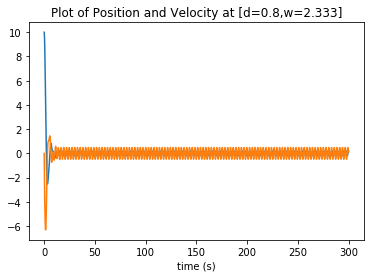

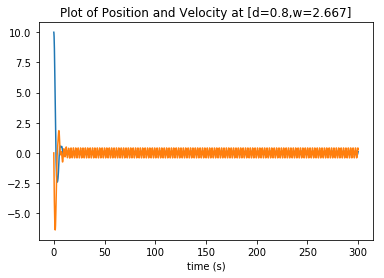

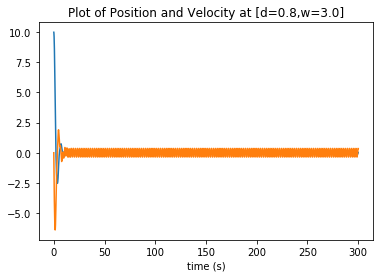

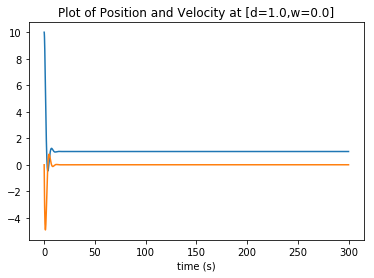

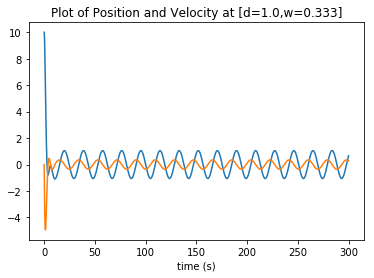

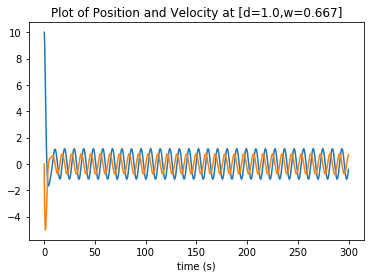

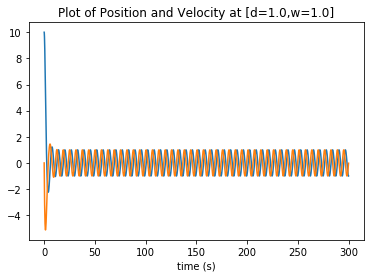

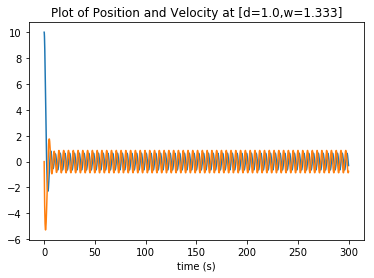

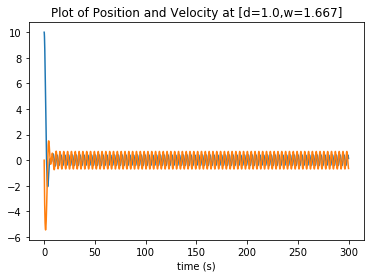

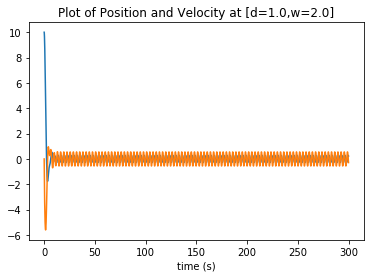

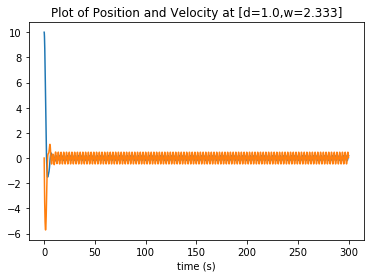

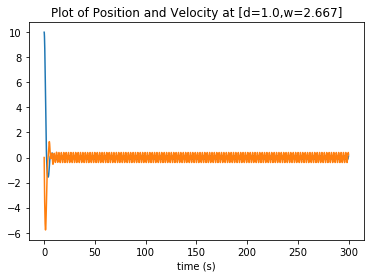

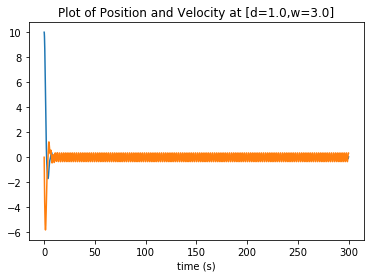

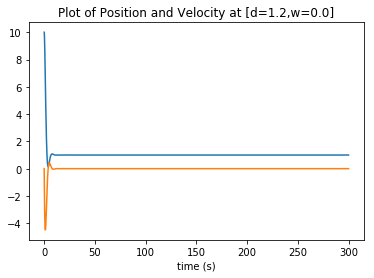

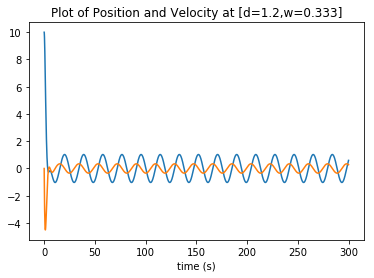

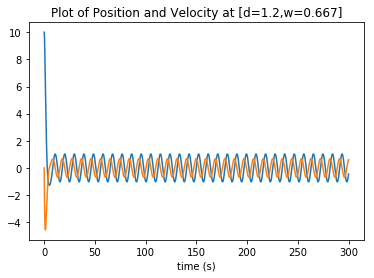

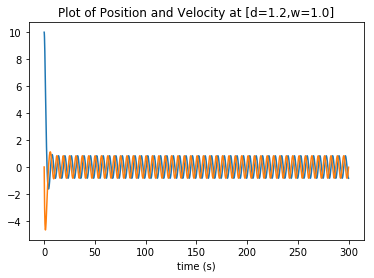

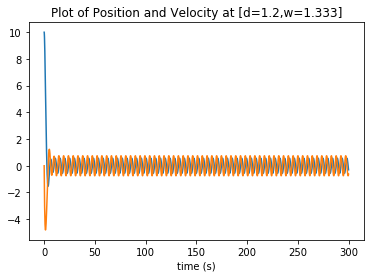

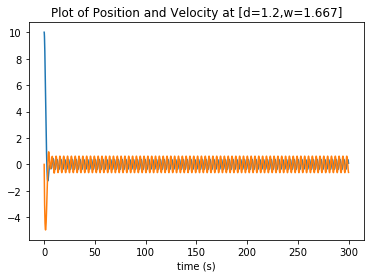

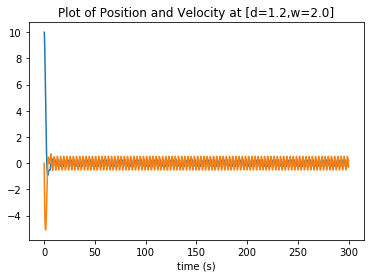

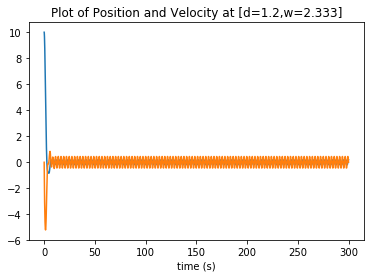

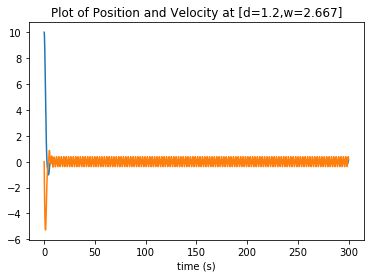

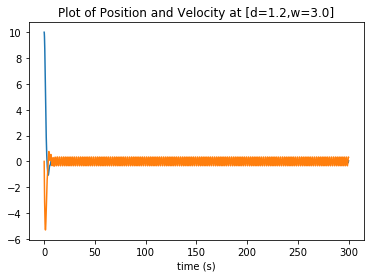

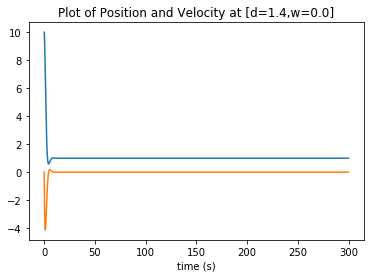

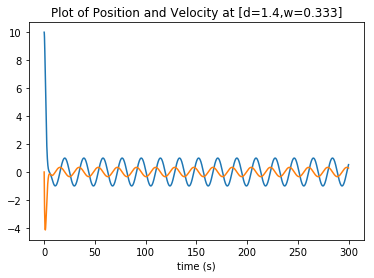

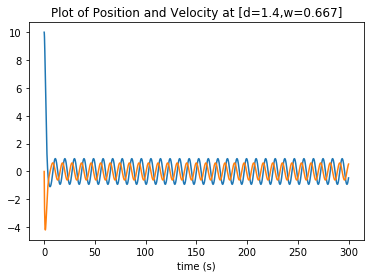

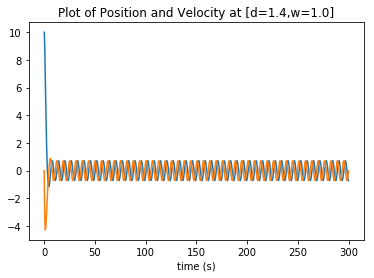

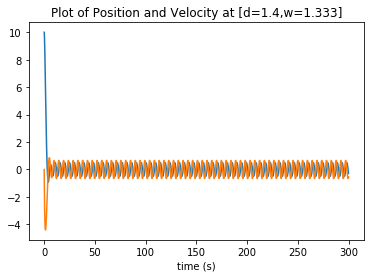

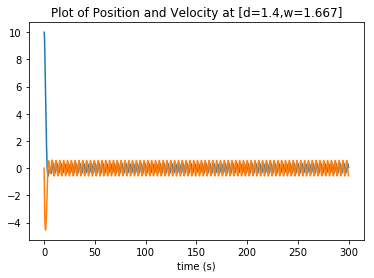

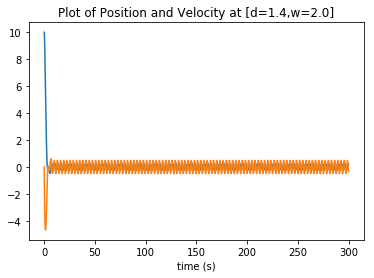

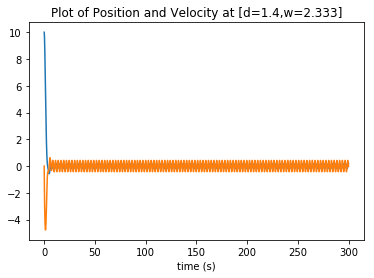

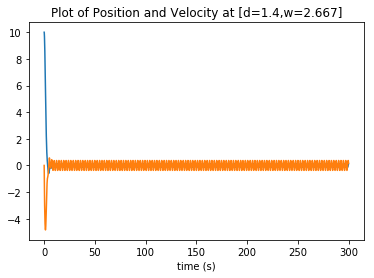

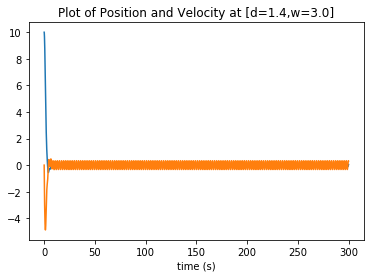

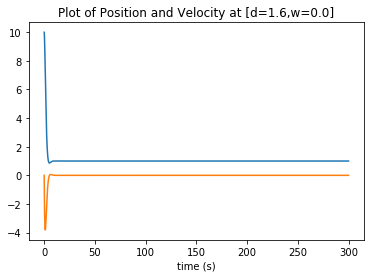

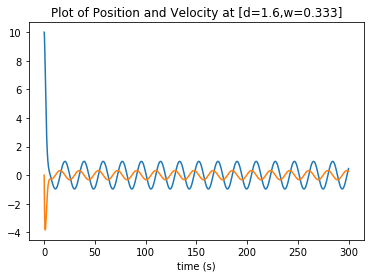

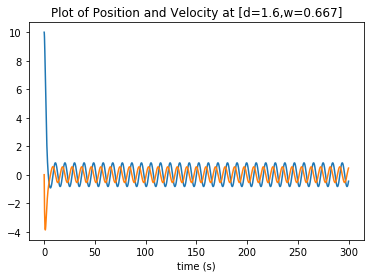

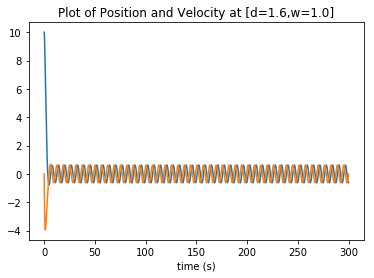

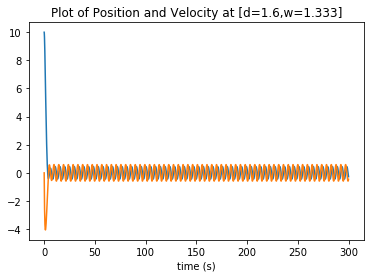

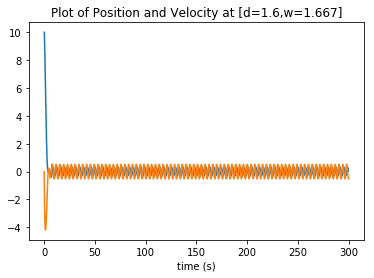

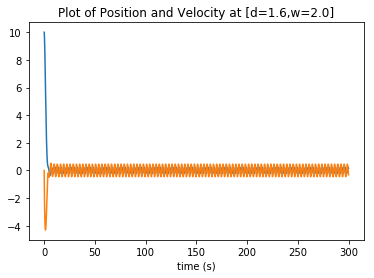

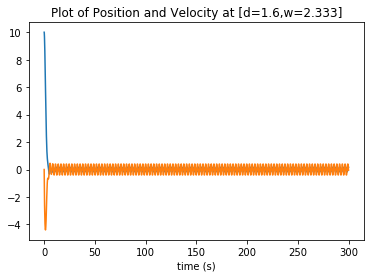

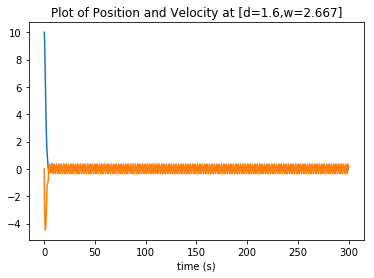

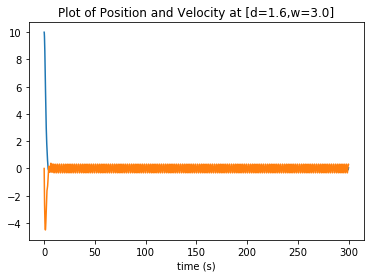

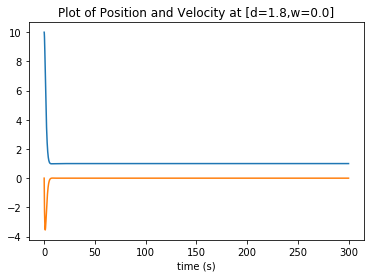

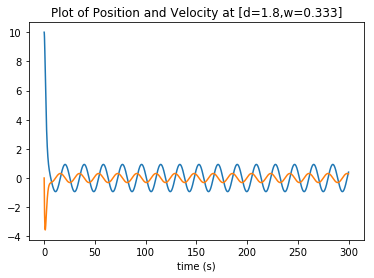

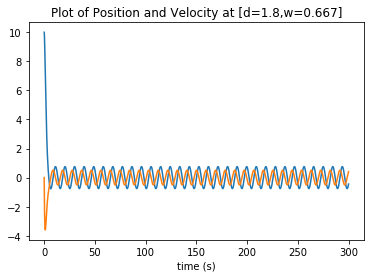

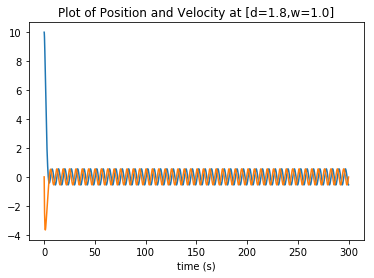

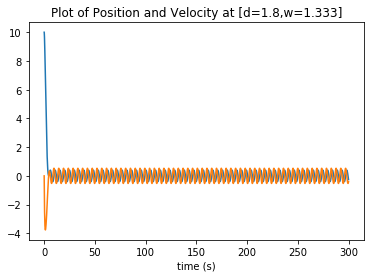

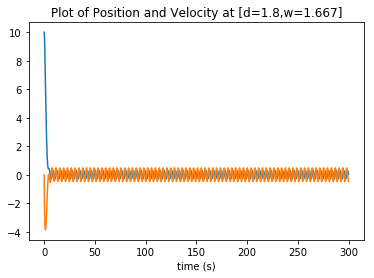

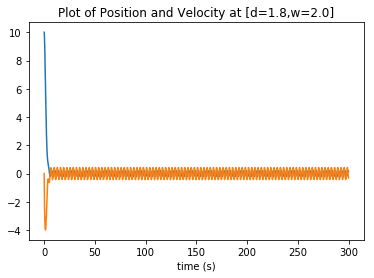

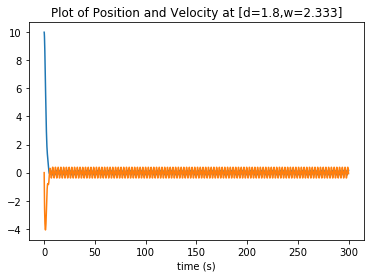

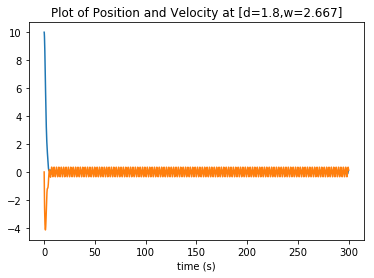

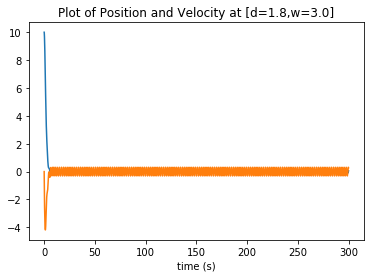

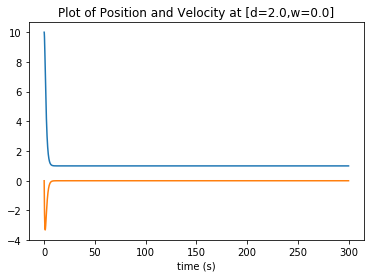

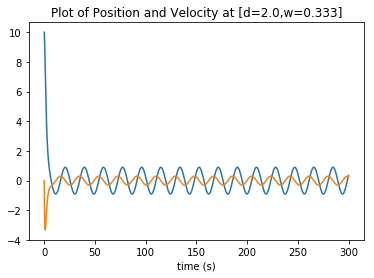

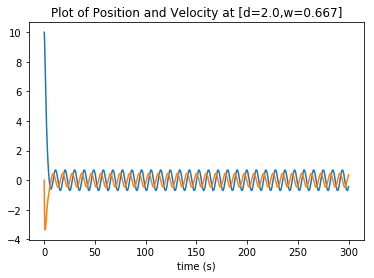

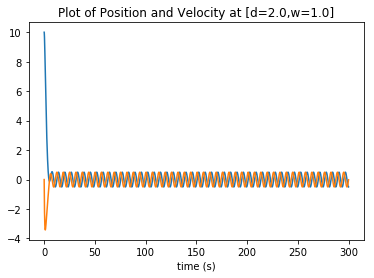

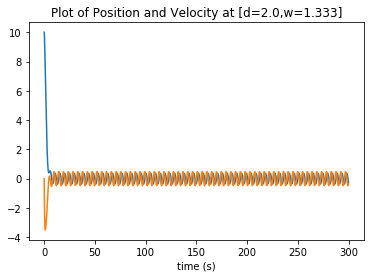

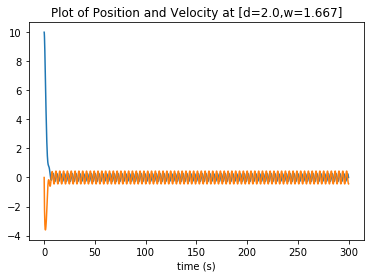

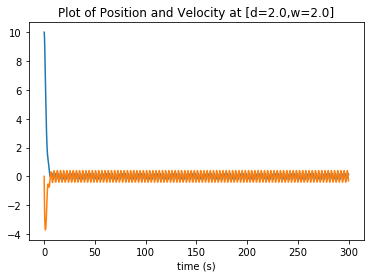

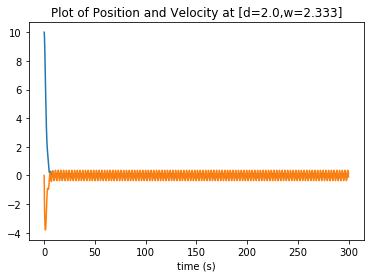

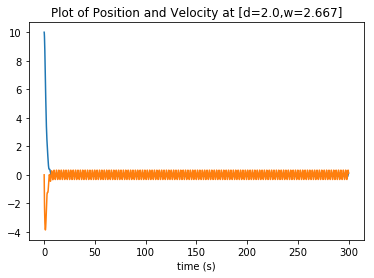

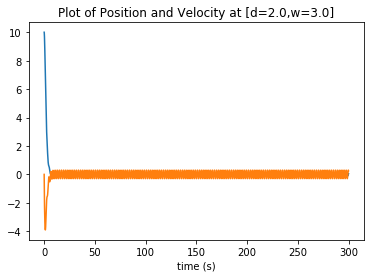

In [4]:
def damping_steady_state_identify(dc_1,dc_2,driv_1,driv_2):
    
# arguments= low bound of damping coefficient, upper bound of damping coefficient, low driving frequency, upper driving frequency
    
    damping_coeff=np.linspace(dc_1,dc_2,num=10)  # setting up spaces, intial values.
    driving_frequency=np.linspace(driv_1,driv_2,num=10)
    timesteps = np.linspace(0.0, 300.0, 5999)
    state_vector_initial = [10.0, 0.0]

    
    for i in damping_coeff:  # this loop will generate 100 plots as num=10 for the damping coeff/driving_frequency linspaces above.
                             # each plot generated will have different values of damping coefficieny c and driving frequency w.
        for j in driving_frequency:
            def func_harmonic_damped_driven( state_vector, time, omega=j, gamma=i, omega_0=1.0):
                x, v = state_vector
                deriv = [v, -omega_0*omega_0*x - gamma*v + 1.0 * np.cos(omega*time)]
                return deriv
            state_vector_sequence = integrate.odeint( func_harmonic_damped_driven, state_vector_initial,timesteps)

            
            plt.plot(timesteps,state_vector_sequence)
            plt.title("Plot of Position and Velocity at [d="+str(i)+",w="+str(round(j,3))+"]")
            plt.xlabel("time (s)")
            plt.show()
            plt.show()
    

damping_steady_state_identify(0.2,2.0,0.0,3.0)

Observations of above plots show that all of them seem to approach a steady state after about 50 seconds. However, Just to be safe, we should set the time required to reach the steady state to be 200 seconds.    
After it reaches steady state, subsequent maximum(minimum) $x$ values are almost identical. So the steady state amplitudes can be obtained by finding the maximum value of the sinusoidal position function $x(t)$ after the system reaches a steady state.

There are many different ways to achieve this. We simply append the x values to a list after the system reaches a steady state and simply use built-in 'max' function to that list to find the maximum value. Note that the doamin of time we obtain the list at must be at least one full sinusoidal period.

Another method to find the maximum is to find the zeroes of the steady velocity function $v(t)$, which we did not attempt, but would love to explore in the future using our root-finding function we built in assignment 2.
  
Below is the result of numerical approach to the Amplitude vs $w/w_o$ plot.

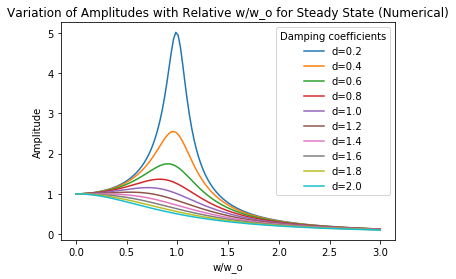

In [5]:
List_max_amplitudes_at_dif_dampingcoeff=[] # this list stores peaks at each coefficient. To be used in summary section


def numerical_plot():
    damping_coeff=np.linspace(0.2,2,num=10)
    driving_frequency=np.linspace(0.0,3,num=135)
    timesteps = np.linspace(0.0, 300.0, 5999)
    state_vector_initial= [1.0, 0.0]
    
    for i in damping_coeff: # we are constantly re-defining the func_harmonic_damped_driven based on damping coefficient and driving frequency
        Amplitude=[]
        for j in driving_frequency:
            def func_harmonic_damped_driven( state_vector, time, omega=j, gamma=i, omega_0=1.0):
                x, v = state_vector
                deriv = [v, -omega_0*omega_0*x - gamma*v + 1.0 * np.cos(omega*time)]
                return deriv
            state_vector_sequence = integrate.odeint( func_harmonic_damped_driven, state_vector_initial, timesteps )


            max_x=[] # stornig values of position x. To be used by 'max' function to find maximum positiion height
            for k in range(4000,5700,1): # in terms of time, this range is 200~285 seconds
                max_x.append(state_vector_sequence[k][0])
            Amplitude.append(max(max_x))
        List_max_amplitudes_at_dif_dampingcoeff.append(max(Amplitude)) # this list will be used in summary
        plt.plot(driving_frequency,Amplitude,label="d="+str(round(i,3)))


    plt.title("Variation of Amplitudes with Relative w/w_o for Steady State (Numerical)")
    plt.xlabel("w/w_o")
    plt.ylabel("Amplitude")
    plt.legend(loc=0, title='Damping coefficients')
    plt.show()
numerical_plot()

# Summary

Now we make a side by side comparison of the theoretical plot and numerical plot. Reader must be reminded that the damping ratio $c$ and coefficient $d$ are distinct, but are related by
\begin{equation}
c=\frac{d}{2\sqrt{m*k}}
\end{equation}
WLOG, $m*k$ can be taken to be $1$ in our example.

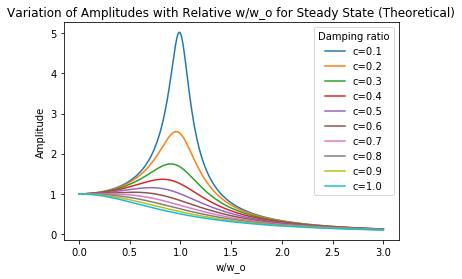

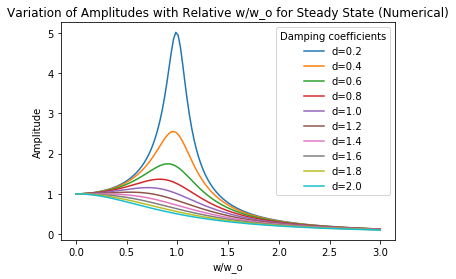

In [6]:
theoretical_plot(0)
numerical_plot()

Qualitatively, they look very similar. But how similar are they in quantitative measures? Determining that is a much bigger task, and here we only compare the peak of the numerical plots at different damping coefficients to the resonance peaks of the theoretical plot at different damping ratios.
To find the resonance frequencies of the theoreticla plot, we simply draw upon the result shown in 
https://en.wikipedia.org/wiki/Harmonic_oscillator
where resonant frequency w_r is
\begin{equation}
w_r=w_o*\sqrt{(1-2c^2)}
\end{equation}
and use the amplitude function defined earlier to compute the resonance peaks of theoretical plot.

In [7]:
resonance_peak_theoretical=[]
def res(c):  # resonance frequency
    return math.sqrt(math.fabs(1-2*(c**2)))

for i in range(1,11,1):
    resonance_peak_theoretical.append(Amplitude_function(res(i/10),i/10))

Now we make a quantitively comparison of the numerical peaks to the theoretical resonance peaks.

In [8]:
print('%-30s%-30s%-30s%-10s' % ('Damping Coefficient','Resonance Peak (Theoretical)','Peak(Numerical)','Difference'))
for i in range(0,len(resonance_peak_theoretical)):
    print('%-30s%-30f%-30f%-10f' %((i+1)/10,resonance_peak_theoretical[i],List_max_amplitudes_at_dif_dampingcoeff[i],resonance_peak_theoretical[i]-List_max_amplitudes_at_dif_dampingcoeff[i]))

Damping Coefficient           Resonance Peak (Theoretical)  Peak(Numerical)               Difference
0.1                           5.025189                      5.019308                      0.005881  
0.2                           2.551552                      2.551160                      0.000392  
0.3                           1.747141                      1.746274                      0.000868  
0.4                           1.363862                      1.363811                      0.000051  
0.5                           1.154701                      1.154563                      0.000138  
0.6                           1.041667                      1.041622                      0.000044  
0.7                           1.000200                      1.000198                      0.000002  
0.8                           0.899770                      1.000000                      -0.100230 
0.9                           0.681487                      1.000000                      -

The bottom three lines of the table above should be discarded because the resonance peak effect does not occur for $c\geq 1/\sqrt{2}$ or $d\geq 2\sqrt{2}$ (source: wiki link above). Excluding the bottom three results, we see that our numerical peaks have relatively small difference with respect to the theoretical resonance peaks. To further improve the accuracy, we conjecture that decreasing the interval of driving frequency would help.